### Data Links :
https://www.kaggle.com/datasets/ra4u12/bookrecommendation

In [11]:
import pandas as pd
import numpy as np


In [12]:
books = pd.read_csv("../data/BX-Books.csv", sep=";", on_bad_lines='skip', encoding="latin-1", low_memory=False)
print("Successfully loaded the books dataset.")

Successfully loaded the books dataset.


In [13]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [14]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [15]:
books.shape

(271360, 8)

In [16]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [17]:
books.iloc[237]['Image-URL-L']

'http://images.amazon.com/images/P/0671027387.01.LZZZZZZZ.jpg'

> We don't need the small and medium image url. Just using the large image url

In [18]:
books = books[["ISBN", "Book-Title", "Book-Author", "Year-Of-Publication", "Publisher", "Image-URL-L"]]

In [19]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [20]:
# Rename the columns for better readability
books = books.rename(columns={
    "ISBN": "isbn",
    "Book-Title": "title",
    "Book-Author": "author",
    "Year-Of-Publication": "year_of_publication",
    "Publisher": "publisher",
    "Image-URL-L": "image_url"
})

In [22]:
books.head()

,isbn,title,author,year_of_publication,publisher,image_url
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
# Now load the second dataframe
users = pd.read_csv("../data/BX-Users.csv", sep=";", on_bad_lines='skip', encoding="latin-1", low_memory=False)
print("Successfully loaded the users dataset.")

Successfully loaded the users dataset.


In [25]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [26]:
users.shape

(278858, 3)

In [27]:
users = users.rename(columns={
    "User-ID": "user_id",
    "Location": "location",
    "Age": "age"
})

In [28]:
users.head()

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
# Now load the third dataframe
ratings = pd.read_csv("../data/BX-Book-Ratings.csv", sep=";", on_bad_lines='skip', encoding="latin-1", low_memory=False)
print("Successfully loaded the ratings dataset.")

Successfully loaded the ratings dataset.


In [31]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [33]:
ratings.shape

(1149780, 3)

In [32]:
ratings = ratings.rename(columns={
    "User-ID": "user_id",
    "ISBN": "isbn",
    "Book-Rating": "rating"
})

In [40]:
ratings.head()

,user_id,isbn,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


> Checking names consistency

In [37]:
books.columns

Index(['isbn', 'title', 'author', 'year_of_publication', 'publisher',
       'image_url'],
      dtype='object')

In [38]:
users.columns

Index(['user_id', 'location', 'age'], dtype='object')

In [39]:
ratings.columns

Index(['user_id', 'isbn', 'rating'], dtype='object')

In [41]:
print(books.shape, users.shape, ratings.shape, sep="\n")

(271360, 6)
(278858, 3)
(1149780, 3)


In [43]:
# Check the distribution of ratings
ratings['user_id'].value_counts()

# From here, we can see that there are many users who have only rated a few books, and a few users who have rated many books (example : user_id = 11676 rates 13602 books). This is a common scenario in recommendation systems, where we often have a long tail of users with few interactions and a small number of users with many interactions.

user_id
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
119573        1
276706        1
276697        1
276679        1
276676        1
Name: count, Length: 105283, dtype: int64

In [47]:
# Storing users who have rated more than 200 books
x = ratings['user_id'].value_counts() > 200

In [51]:
x

user_id
11676      True
198711     True
153662     True
98391      True
35859      True
          ...  
119573    False
276706    False
276697    False
276679    False
276676    False
Name: count, Length: 105283, dtype: bool

In [50]:
x[x].shape

(899,)

In [52]:
y = x[x].index

In [53]:
y

Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352, 110973,
       235105,
       ...
       116122,  44296,  28634,  59727,  73681, 274808, 188951,   9856, 155916,
       268622],
      dtype='int64', name='user_id', length=899)

In [54]:
ratings = ratings[ratings['user_id'].isin(y)]
# Now we have filtered the ratings dataframe to only include ratings from users who have rated more than 200 books. This will help us focus on the most active users in our recommendation system, which can lead to better recommendations and a more robust model.

In [55]:
ratings.head()

,user_id,isbn,rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0


In [57]:
# Now join ratings with books

ratings_with_books = ratings.merge(books, on='isbn')

In [58]:
ratings_with_books.head()

,user_id,isbn,rating,title,author,year_of_publication,publisher,image_url
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
1,277427,0026217457,0,Vegetarian Times Complete Cookbook,Lucy Moll,1995,John Wiley &amp; Sons,http://images.amazon.com/images/P/0026217457.0...
2,277427,003008685X,8,Pioneers,James Fenimore Cooper,1974,Thomson Learning,http://images.amazon.com/images/P/003008685X.0...
3,277427,0030615321,0,"Ask for May, Settle for June (A Doonesbury book)",G. B. Trudeau,1982,Henry Holt &amp; Co,http://images.amazon.com/images/P/0030615321.0...
4,277427,0060002050,0,On a Wicked Dawn (Cynster Novels),Stephanie Laurens,2002,Avon Books,http://images.amazon.com/images/P/0060002050.0...


In [63]:
ratings_with_books.shape

(487671, 8)

In [ ]:
# We want to know how many ratings each book has received. This information can be useful for various purposes, such as identifying popular books or filtering out books with very few ratings.
number_rating = ratings_with_books.groupby('title').count()['rating'].reset_index()

In [60]:
number_rating.head()

,title,rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [61]:
number_rating = number_rating.rename(columns={'rating': 'num_of_ratings'})

In [62]:
number_rating.head()

,title,num_of_ratings
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [64]:
final_rating = ratings_with_books.merge(number_rating, on='title')

In [65]:
final_rating.head()

,user_id,isbn,rating,title,author,year_of_publication,publisher,image_url,num_of_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,277427,0026217457,0,Vegetarian Times Complete Cookbook,Lucy Moll,1995,John Wiley &amp; Sons,http://images.amazon.com/images/P/0026217457.0...,7
2,277427,003008685X,8,Pioneers,James Fenimore Cooper,1974,Thomson Learning,http://images.amazon.com/images/P/003008685X.0...,1
3,277427,0030615321,0,"Ask for May, Settle for June (A Doonesbury book)",G. B. Trudeau,1982,Henry Holt &amp; Co,http://images.amazon.com/images/P/0030615321.0...,1
4,277427,0060002050,0,On a Wicked Dawn (Cynster Novels),Stephanie Laurens,2002,Avon Books,http://images.amazon.com/images/P/0060002050.0...,13


In [66]:
final_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487671 entries, 0 to 487670
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   user_id              487671 non-null  int64 
 1   isbn                 487671 non-null  object
 2   rating               487671 non-null  int64 
 3   title                487671 non-null  object
 4   author               487670 non-null  object
 5   year_of_publication  487671 non-null  object
 6   publisher            487669 non-null  object
 7   image_url            487668 non-null  object
 8   num_of_ratings       487671 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 33.5+ MB


In [68]:
final_rating = final_rating[final_rating['num_of_ratings'] >= 50]

In [69]:
final_rating.head()

,user_id,isbn,rating,title,author,year_of_publication,publisher,image_url,num_of_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
13,277427,0060930535,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,133
15,277427,0060934417,0,Bel Canto: A Novel,Ann Patchett,2002,Perennial,http://images.amazon.com/images/P/0060934417.0...,108
18,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,http://images.amazon.com/images/P/0061009059.0...,108
24,277427,006440188X,0,The Secret Garden,Frances Hodgson Burnett,1998,HarperTrophy,http://images.amazon.com/images/P/006440188X.0...,79


In [70]:
final_rating.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61853 entries, 0 to 487619
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              61853 non-null  int64 
 1   isbn                 61853 non-null  object
 2   rating               61853 non-null  int64 
 3   title                61853 non-null  object
 4   author               61853 non-null  object
 5   year_of_publication  61853 non-null  object
 6   publisher            61853 non-null  object
 7   image_url            61853 non-null  object
 8   num_of_ratings       61853 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 4.7+ MB


In [ ]:
# Count the total number of duplicate rows
final_rating.duplicated().sum()

np.int64(0)

In [80]:
# Count the number of duplicate rows based on 'user_id' and 'title'
duplicates = final_rating.duplicated(['user_id', 'title']).sum()
print(f"Duplicates based on user_id and title: {duplicates}")

# You should know the diiference and how it works between duplicated() and duplicated(subset=['user_id', 'title']). The first one checks for duplicate rows based on all columns, while the second one checks for duplicate rows based on a specific subset of columns (in this case, 'user_id' and 'title'). In the context of a recommendation system, we are often interested in identifying duplicate ratings from the same user for the same book, which is why we use the subset parameter to focus on those specific columns.

Duplicates based on user_id and title: 2003


In [ ]:
# Seeing the duplicate rows based on 'user_id' and 'title'
final_rating[final_rating.duplicated(['user_id', 'title'], keep=False)].sort_values(['user_id', 'title']).head(6)

,user_id,isbn,rating,title,author,year_of_publication,publisher,image_url,num_of_ratings
5091,254,0439064864,9,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439064864.0...,183
5092,254,0439064872,9,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439064872.0...,183
5093,254,0439136350,9,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439136350.0...,138
5094,254,0439136369,9,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,2001,Scholastic,http://images.amazon.com/images/P/0439136369.0...,138
5070,254,0380789019,0,Neverwhere,Neil Gaiman,1998,Avon,http://images.amazon.com/images/P/0380789019.0...,72
5074,254,0380973634,10,Neverwhere,Neil Gaiman,1997,William Morrow,http://images.amazon.com/images/P/0380973634.0...,72


In [82]:
# Drop duplicate rows based on 'user_id' and 'title', keeping the first occurrence
final_rating = final_rating.drop_duplicates(subset=['user_id', 'title'], keep='first')

In [83]:
duplicates = final_rating.duplicated(['user_id', 'title']).sum()
print(f"Duplicates based on user_id and title: {duplicates}")

Duplicates based on user_id and title: 0


In [76]:
# Check for missing values in each column
final_rating.isnull().sum()

user_id                0
isbn                   0
rating                 0
title                  0
author                 0
year_of_publication    0
publisher              0
image_url              0
num_of_ratings         0
dtype: int64

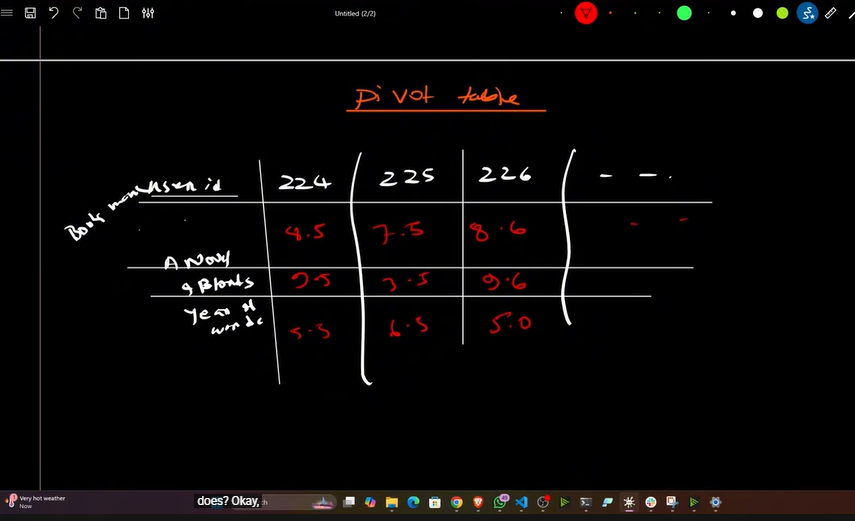

> This explaination is being generated by AI. It is a good explanation and you have to understand it why in the next step we will do something called `pivot table`

Let's dive incredibly deep into the **Pivot Table** and why it is the absolute backbone of the Collaborative Filtering Recommender System you are building.

To really understand it, we need to look at how your data is currently shaped, how a pivot table changes it, and *why* the Machine Learning algorithm demands this new shape.

---

### 1. The "Before" State: Long Format Data

Right now, your `final_rating` dataset is in a "long" format. Every single time a user rates a book, it creates a brand new row.

Imagine a tiny version of your dataset looks like this:

| user_id | title | rating |
| --- | --- | --- |
| **User A** | Harry Potter | 10 |
| **User B** | Harry Potter | 8 |
| **User A** | The Hobbit | 9 |
| **User C** | The Da Vinci Code | 7 |
| **User B** | The Da Vinci Code | 9 |

This format is great for storing data efficiently in a database, but **Machine Learning models cannot read data this way**. An algorithm like Nearest Neighbors (which you will use) needs to see the *entire behavior* of a single user in one single row.

### 2. The "After" State: The Pivot Table Matrix

When you create a Pivot Table, you are basically rotating the data. You are telling pandas:

* Make a unique row for every single `user_id`.
* Make a unique column for every single book `title`.
* Fill the intersections (the cells) with the `rating`.

If we pivot the table from Step 1, it transforms into this massive grid (matrix):

| user_id | Harry Potter | The Hobbit | The Da Vinci Code |
| --- | --- | --- | --- |
| **User A** | 10 | 9 | `NaN` |
| **User B** | 8 | `NaN` | 9 |
| **User C** | `NaN` | `NaN` | 7 |

**What is `NaN`?** `NaN` stands for *Not a Number*. If User A never read "The Da Vinci Code", there is no rating to put in that box. Pandas leaves it blank as `NaN`.

### 3. Why is this shape mandatory for Collaborative Filtering?

In the video, Bappy explains that Collaborative Filtering relies on grouping users who have the same interests. To do this, the computer looks at each row as a mathematical coordinate called a **vector**.

Look at the Pivot Table above from the computer's perspective:

* **User A's Vector:** `[10, 9, NaN]`
* **User B's Vector:** `[8, NaN, 9]`

To find out if User A and User B have similar tastes, the machine learning algorithm measures the "distance" between these two vectors. If the distance is small, they are placed in the same "cluster". If User A reads a new book and rates it highly, the system will automatically recommend it to User B because they are in the same cluster!

### 4. Fixing the `NaN` Problem (Filling Zeros)

Machine learning models hate `NaN` values; math equations break if you try to add or multiply a blank space. Because a `NaN` in this context means "the user hasn't read or rated this book yet," we must replace every single `NaN` with the number `0`.

After filling with zeros, the data is perfectly ready for the algorithm:

| user_id | Harry Potter | The Hobbit | The Da Vinci Code |
| --- | --- | --- | --- |
| **User A** | 10 | 9 | **0** |
| **User B** | 8 | **0** | 9 |
| **User C** | **0** | **0** | 7 |

---

### The Code Implementation

Here is the exact code to execute this transformation in your Jupyter Notebook:

```python
# Create the pivot table: users as rows, book titles as columns, ratings as values
book_pivot = final_rating.pivot_table(columns='title', index='user_id', values='rating')

# Replace all the NaN (missing) values with 0 so the model can process it
book_pivot.fillna(0, inplace=True)

# Preview the new matrix shape
book_pivot.head()

```

### The Next Big Challenge...

Once you run this code, you will notice something: your table is going to be incredibly wide and mostly filled with zeros (because a single user reads only a tiny fraction of all existing books). In data science, this is called a **Sparse Matrix**.

If you feed this massive, zero-filled table directly to your model, your computer's memory might crash. To fix this, in the next step, you will convert this table into a **CSR Matrix** *(Compressed Sparse Row)* to compress the zeros and save memory.


In [85]:
# Create the pivot table: users as rows, book titles as columns, ratings as values
book_pivot = final_rating.pivot_table(columns='user_id', index='title', values='rating')

# Replace all the NaN (missing) values with 0 so the model can process it
book_pivot.fillna(0, inplace=True)

# Preview the new matrix shape
book_pivot.head()

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0


In [86]:
book_pivot.shape

(742, 888)

> about csr matrix : 

Read the [A Gentle Introduction to Sparse Matrices for Machine Learning](https://machinelearningmastery.com/sparse-matrices-for-machine-learning/)

> Or maybe read these generated content by gemini, about what and why we do this : 

Now that you have your massive Pivot Table, we hit a literal roadblock in your computer's RAM. To solve it, we need the **CSR Matrix** (Compressed Sparse Row).

Let's break down exactly what this is, why the video uses it, and how it saves your computer from crashing.

### 1. The "Sparse Matrix" Problem

Imagine your Pivot Table is fully built. You have around 899 highly active users and thousands of books.
Even though these are "active" users, a single human cannot read *every single book* in the world.

If you look at User A's row across 10,000 books, they might have rated 200 of them. That means **9,800 columns in their row are just the number `0**`.

In Data Science, a matrix (table) where the vast majority of the data is zero is called a **Sparse Matrix**.

* **The Problem:** Pandas allocates physical computer memory for *every single zero*. If you have a table with millions of cells, and 99% of them are zeros, you are wasting gigabytes of RAM storing "nothing." If you try to feed this directly to a Machine Learning model, it will take forever to compute or just throw a `MemoryError`.

### 2. CSR Matrix to the Rescue!

To fix this, the video introduces a tool from the `scipy` library called `csr_matrix`. CSR stands for **Compressed Sparse Row**.

Think of CSR as a super-smart librarian. Instead of reading an entire row like: *"Zero, zero, zero, zero, zero, zero, 8, zero, zero..."*, the CSR Matrix simply creates a treasure map of only the non-zero numbers.

**An Example in Action:**
Imagine this tiny, sparse Pivot Table:

| User | Book 1 | Book 2 | Book 3 | Book 4 |
| --- | --- | --- | --- | --- |
| **User A** | **0** | **0** | 9 | **0** |
| **User B** | **0** | **0** | **0** | **0** |
| **User C** | 7 | **0** | **0** | **0** |

If you convert this table to a CSR Matrix, the computer throws away the visual table and only memorizes the coordinates of the actual ratings:

* Value `9` is at `(User A, Book 3)`
* Value `7` is at `(User C, Book 1)`

It completely ignores the zeros, and it even ignores `User B` entirely because they have no ratings! This compression shrinks your data size down to a tiny fraction of its original weight.

### 3. Why the Algorithm Loves It

The specific Machine Learning algorithm you are going to use is called **Nearest Neighbors**. This algorithm is mathematically designed to natively accept and process CSR Matrices. It calculates the "distances" between book ratings at lightning speed because it skips doing math on all the zeros.

---

### The Code Implementation

Here is how you execute this brilliant compression step in your code. We will use the `scipy` scientific library to handle the math:

```python
# Import the CSR Matrix function from the Scipy library
from scipy.sparse import csr_matrix

# Convert your bulky pandas Pivot Table into a compressed sparse matrix
book_sparse = csr_matrix(book_pivot)

# Check the type to confirm it worked!
print(type(book_sparse))

```

If you run `print(book_sparse)`, instead of seeing a nice table, you will just see a long list of mathematical coordinates and their values. That is exactly what you want!

Your data is now 100% prepped, compressed, and ready for Machine Learning.



> THINGS TO REMEMBER : 

This is one of the most important questions you can ask in Machine Learning! You are hitting on the core difference between the two main types of Recommender Systems.

Let's break down exactly why the orientation of the Pivot Table changes everything, what happens if you flip it, and the "Golden Rule" you can use for all your future Data Science projects.

### 1. How the Algorithm Reads Data (The Machine's Perspective)

Algorithms like `NearestNeighbors` are programmed to read data **horizontally** (row by row).
To the algorithm, **one row = one complete object**.

When it calculates the "distance," it is always calculating the distance between **Row 1** and **Row 2**. It cannot calculate the distance between columns.

### 2. What Happens if `index='title'` (Books as Rows)

If you set the books as the index, your matrix looks like this:

* **Row 1:** Harry Potter (Ratings: User A=10, User B=0, User C=8)
* **Row 2:** Twilight (Ratings: User A=0, User B=9, User C=0)

Because the books are the rows, the algorithm calculates the distance between *Harry Potter* and *Twilight*.
When you query the model, it says: *"Book A is mathematically similar to Book B."*
This is called **Item-Based Collaborative Filtering**. This is what you are building right now!

### 3. What Happens if `index='user_id'` (Users as Rows)

If you reverse it and set the users as the index, your matrix flips:

* **Row 1:** User A (Ratings: Harry Potter=10, Twilight=0)
* **Row 2:** User B (Ratings: Harry Potter=0, Twilight=9)

Because the users are now the rows, the algorithm calculates the distance between *User A* and *User B*.
If you train your model on this flipped table, and you try to ask it: *"What books are similar to Harry Potter?"*, the model will **crash**.
Why? Because the model only memorized Users! It will say: *"I don't know what a Harry Potter is, I only know how to find Users that are similar to User A."*

This is called **User-Based Collaborative Filtering**.

### 4. The "Golden Rule" for the Future 🌟

How do you know what goes where for your future AI projects? Just ask yourself this one question:

> **"What is my input, and what do I want to find matches for?"**

**Whatever your input is, that MUST be your index (rows).**

* **Example 1 (Spotify Clone):** You want users to click on a *Song*, and you want to recommend 5 similar *Songs*.
* **Index (Rows):** Songs
* **Columns:** Users


* **Example 2 (Tinder/Dating App):** You want to look at *Person A*, and recommend 5 similar *People* they might like.
* **Index (Rows):** People (User IDs)
* **Columns:** Hobbies/Interests


* **Example 3 (E-commerce):** You want a user to view a *Laptop*, and recommend 5 similar *Laptops*.
* **Index (Rows):** Products (Laptops)
* **Columns:** Users



### Back to Your Code

In your specific `recommend_book(book_name)` function, your input is a `book_name` (like "Harry Potter"). Because your input is a book, the books *must* be the rows (`index='title'`). If they aren't, the function `np.where(book_pivot.index == book_name)` will fail because it will be searching a list of User IDs for the word "Harry Potter"!

In [94]:
from scipy.sparse import csr_matrix
book_sparse = csr_matrix(book_pivot)

In [88]:
print(type(book_sparse))

<class 'scipy.sparse._csr.csr_matrix'>


In [90]:
book_sparse

<742x888 sparse matrix of type '<class 'numpy.float64'>'
	with 14961 stored elements in Compressed Sparse Row format>

> About Nearest Neighbours

[![Watch the video](https://img.youtube.com/vi/G8a8bJuQxnw/hqdefault.jpg)](https://www.youtube.com/watch?v=G8a8bJuQxnw)


In [93]:
from sklearn.neighbors import NearestNeighbors
# Initialize the model using Brute Force, but upgrade the ruler to Cosine
model = NearestNeighbors(metric='cosine', algorithm='brute')

# Train it on your compressed matrix
model.fit(book_sparse)

NearestNeighbors(algorithm='brute', metric='cosine')

Let’s look at a **really real, step-by-step mathematical example** of exactly what the Nearest Neighbors algorithm is doing behind the scenes.

### Step 1: The Setup (Your Mini Pivot Table)

Imagine your Pivot Table is finally built, but it is tiny. We only have **3 Users** and **4 Books**. The numbers are the ratings (from 1 to 10), and `0` means the user hasn't read it.

Here is what the algorithm sees:

| Book Title | User 1's Rating | User 2's Rating | User 3's Rating |
| --- | --- | --- | --- |
| **Harry Potter** | 9 | 0 | 8 |
| **Lord of the Rings** | 10 | 0 | 9 |
| **Twilight** | 0 | 9 | 0 |
| **The Notebook** | 0 | 8 | 2 |

Notice the pattern? User 1 and User 3 love fantasy books (Harry Potter, Lord of the Rings). User 2 loves romance (Twilight, The Notebook).

### Step 2: The Algorithm's Mission

You ask the algorithm: **"Recommend books similar to *Harry Potter*."**

The algorithm isolates the "Vector" (the row of numbers) for *Harry Potter*:

* **Harry Potter's Vector:** `[9, 0, 8]`

Because it is using the "brute" method, it is currently "blind." It must literally calculate the mathematical distance between `[9, 0, 8]` and every single other book's vector in the table.

### Step 3: The Actual Math (Calculating Distance)

To find the distance, the algorithm usually uses a simple formula like **Euclidean Distance** (which is just the Pythagorean theorem applied to data). It subtracts the ratings, squares them, adds them up, and takes the square root.

Let's watch the computer do the math:

**1. Harry Potter vs. Harry Potter**

* Math: (9-9)^2 + (0-0)^2 + (8-8)^2 = 0 + 0 + 0 = 0
* **Distance: 0** (It is the exact same book! This is why the first result in the video's array is always a `0` distance).

**2. Harry Potter vs. Lord of the Rings**

* Vector comparison: `[9, 0, 8]` vs `[10, 0, 9]`
* Math: (9-10)^2 + (0-0)^2 + (8-9)^2  = (-1)^2 + 0 + (-1)^2 = 1 + 0 + 1 = 2
* Square root of 2: **1.41**
* **Distance: 1.41** (Very close!)

**3. Harry Potter vs. Twilight**

* Vector comparison: `[9, 0, 8]` vs `[0, 9, 0]`
* Math: (9-0)^2 + (0-9)^2 + (8-0)^2 = 81 + 81 + 64 = 226
* Square root of 226: **15.03**
* **Distance: 15.03** (Very far away!)

**4. Harry Potter vs. The Notebook**

* Vector comparison: `[9, 0, 8]` vs `[0, 8, 2]`
* Math: (9-0)^2 + (0-8)^2 + (8-2)^2 = 81 + 64 + 36 = 181
* Square root of 181: **13.45**
* **Distance: 13.45** (Still very far away!)

### Step 4: The Final Result

After calculating the distance to every single book using brute force, the algorithm takes the results and sorts them from lowest distance (closest) to highest distance (farthest):

1. **Harry Potter** (Distance: 0.00)
2. **Lord of the Rings** (Distance: 1.41)
3. **The Notebook** (Distance: 13.45)
4. **Twilight** (Distance: 15.03)

If you tell your Python code to return the top 2 suggestions, the algorithm drops the book itself (distance 0) and hands you the next closest one: **Lord of the Rings**.

It didn't know the genres. It didn't know the authors. It simply found that the people who rated *Harry Potter* highly also rated *Lord of the Rings* highly, which kept the mathematical distance between their vectors extremely small.

---

That is the absolute reality of what your code is executing in milliseconds for thousands of books.

Now that you have seen the exact math behind the curtain, are you ready to write the Python function `recommend_book()` that will output these suggestions on your screen?

In [95]:
book_pivot.iloc[237, :]

user_id
254       9.0
2276      0.0
2766      0.0
2977      0.0
3363      0.0
         ... 
275970    9.0
277427    0.0
277478    0.0
277639    0.0
278418    0.0
Name: Harry Potter and the Chamber of Secrets (Book 2), Length: 888, dtype: float64

> my question : oh ya bentar aku masih gak nangkepp, model kita ini itu berarti kek ngebandinging atau mungkin merekomendasikan kan, user a misalnya sama kek user C, makanya itu, kalau user c suka sesuatuu maka user A dapat rekomen ituu. Nah kenapa kalau gitu bukannya si index nyaitu yang berupa user?

Gemini answer : 

You just caught one of the biggest contradictions in this entire tutorial! Your logic is absolutely flawless.

As you dive deeper into data science, you will notice that sometimes instructors explain one concept but code another. That is exactly what happened here.

Let’s clear up this massive confusion. There are actually **two different types** of Collaborative Filtering, and the YouTuber mixed them up in his explanation!

### 1. What the Video *Explained* (User-Based CF)

Around the 1 hour and 4 minute mark, the creator explains the theory: *"User 1 and User 2 have similar interests based on their ratings. So whatever User 1 is searching, I can recommend to User 2"*.

This is called **User-Based Collaborative Filtering**.
If you want to build *this* exact system, **you are 100% correct**. The `user_id` MUST be the index (the rows) of your Pivot Table. If you put `user_id` as the rows, the algorithm calculates the distance between User A and User C.

### 2. What the Video *Actually Coded* (Item-Based CF)

However, look at the final goal of the app. The app doesn't ask you to input a User ID. The app asks you to select a **Book Name** (like *Harry Potter*), and then it recommends other **Books**.

Because the input is a Book, and the output is Books, the code is actually doing **Item-Based Collaborative Filtering**.

* To make this work, the books MUST be the index (the rows).
* The algorithm looks at *Harry Potter* (Row 1) and *Lord of the Rings* (Row 2). It checks the columns (the users) and says: *"Ah, the same users who gave high ratings to Row 1 also gave high ratings to Row 2. Therefore, these two books are mathematically similar!"*

### Summary of the Mix-Up

* **The YouTuber's Words:** "We will find similar users."
* **The YouTuber's Code:** "We will find similar books based on user rating patterns."

Your analytical thinking caught this mismatch perfectly. If you ever work on a project where the client says, *"I want to input a User ID and see what they should buy next,"* you will immediately know to flip the Pivot Table and put `user_id` as the index!

Since we are building the "Item-Based" version where you search for a book, your `book_pivot` with the books as the index is perfectly set up.


> The short answer is: The video is not "wrong" in its code, but it is definitely confusing and inconsistent in its explanation.

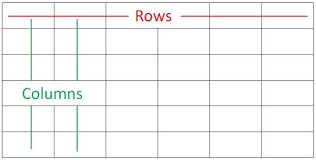